In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
import os

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [13]:
df_raw = pd.read_csv("data/beauty2_20201104150501.csv", encoding="cp949")

In [14]:
df_raw

,국가(대륙)별,상품군별,판매유형별,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4 p)
0,합계,합계,계,768504,574551,749612,858240,833672,897205,921586,974060,1250236,1344404,1525396,1879499,1525487,1277716,1615969
1,중국,합계,계,619963,438705,589905,667606,646426,717843,744661,782962,1055895,1140195,1317494,1664465,1327577,1095112,1456338
2,합계,합계,면세점,610257,441096,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635,1297490,1051987,1421509
3,합계,화장품,계,591665,428572,569631,646114,604771,658878,694831,751804,1033586,1097379,1276592,1610022,1312146,1076190,1432899
4,중국,합계,면세점,571724,405125,562049,610041,604688,670391,707619,727126,1012118,1092077,1270158,1599893,1253633,1034738,1403572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,기타,사무·문구,면세점,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
446,기타,음반·비디오·악기,면세점,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
447,기타,아동·유아용품,면세점,0,0,0,0,0,0,11,4,0,4,4,6,2,0,0
448,기타,농축수산물,면세점,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df_raw.shape

(450, 18)

In [16]:
df_raw["국가(대륙)별"].value_counts()

일본            45
미국            45
중국            45
대양주           45
아세안(ASEAN)    45
유럽연합(EU)      45
합계            45
기타            45
중남미           45
중동            45
Name: 국가(대륙)별, dtype: int64

In [17]:
df_raw[df_raw["국가(대륙)별"] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4 p)
13,미국,합계,계,45169,40976,41927,53209,42679,40207,37631,48978,40918,44861,55386,53848,48277,64225,53052
14,미국,합계,면세점 이외,37009,31793,32458,41032,37495,36604,35314,46899,38261,41910,53568,52367,47579,63886,52971
30,미국,화장품,계,15510,15511,15997,22310,13909,11219,9717,15738,10817,11310,13999,13494,12402,11594,8581
31,미국,의류 및 패션 관련상품,계,13606,11091,11173,14483,11815,12169,10233,13658,12257,13571,13243,15964,12480,22360,17701
32,미국,의류 및 패션 관련상품,면세점 이외,13508,11004,11025,14354,11699,12015,10099,13540,12147,13456,13148,15873,12444,22365,17679
41,미국,합계,면세점,8160,9183,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481,698,339,81
42,미국,화장품,면세점,7971,9005,9202,11913,4927,3311,2028,1780,2366,2647,1550,1271,625,337,47
46,미국,화장품,면세점 이외,7539,6506,6795,10397,8982,7908,7689,13958,8451,8663,12449,12223,11777,11257,8534
73,미국,생활용품 및 자동차용품,계,3060,2741,2349,2276,2483,2357,2150,2159,2174,2410,3409,3713,2212,3054,2935
74,미국,생활용품 및 자동차용품,면세점 이외,3060,2741,2349,2276,2483,2357,2150,2159,2174,2410,3407,3713,2212,3054,2935


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 48 to 449
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   국가(대륙)별      378 non-null    object
 1   상품군별         378 non-null    object
 2   판매유형별        378 non-null    object
 3   2020 2/4     378 non-null    int64 
 4   2020 3/4 p)  378 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 17.7+ KB


In [103]:
df_raw.melt?

In [35]:
df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"])

,국가(대륙)별,상품군별,판매유형별,variable,value
0,합계,합계,계,2017 1/4,768504
1,중국,합계,계,2017 1/4,619963
2,합계,합계,면세점,2017 1/4,610257
3,합계,화장품,계,2017 1/4,591665
4,중국,합계,면세점,2017 1/4,571724
...,...,...,...,...,...
6745,기타,사무·문구,면세점,2020 3/4 p),0
6746,기타,음반·비디오·악기,면세점,2020 3/4 p),0
6747,기타,아동·유아용품,면세점,2020 3/4 p),0
6748,기타,농축수산물,면세점,2020 3/4 p),0


In [37]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="백만원")
df.shape

(6750, 5)

In [38]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2017 1/4,768504
1,중국,합계,계,2017 1/4,619963
2,합계,합계,면세점,2017 1/4,610257
3,합계,화장품,계,2017 1/4,591665
4,중국,합계,면세점,2017 1/4,571724


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  6750 non-null   object
 1   상품군별     6750 non-null   object
 2   판매유형별    6750 non-null   object
 3   기간       6750 non-null   object
 4   백만원      6750 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 263.8+ KB


In [40]:
df["기간"]

0          2017 1/4
1          2017 1/4
2          2017 1/4
3          2017 1/4
4          2017 1/4
           ...     
6745    2020 3/4 p)
6746    2020 3/4 p)
6747    2020 3/4 p)
6748    2020 3/4 p)
6749    2020 3/4 p)
Name: 기간, Length: 6750, dtype: object

In [41]:
df["기간"].map(lambda x : int(x.split()[0]))

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
6745    2020
6746    2020
6747    2020
6748    2020
6749    2020
Name: 기간, Length: 6750, dtype: int64

In [42]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2017 1/4,768504,2017
1,중국,합계,계,2017 1/4,619963,2017
2,합계,합계,면세점,2017 1/4,610257,2017
3,합계,화장품,계,2017 1/4,591665,2017
4,중국,합계,면세점,2017 1/4,571724,2017


In [52]:
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2017 1/4,768504,2017,1
1,중국,합계,계,2017 1/4,619963,2017,1
2,합계,합계,면세점,2017 1/4,610257,2017,1
3,합계,화장품,계,2017 1/4,591665,2017,1
4,중국,합계,면세점,2017 1/4,571724,2017,1


In [53]:
df["백만원"].replace("-", pd.np.nan)

<ipython-input-53-5960947408c6>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df["백만원"].replace("-", pd.np.nan)


0       768504
1       619963
2       610257
3       591665
4       571724
         ...  
6745         0
6746         0
6747         0
6748         0
6749         0
Name: 백만원, Length: 6750, dtype: int64

In [54]:
df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)
df["백만원"]

<ipython-input-54-a9186019dd39>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)


0       768504.0
1       619963.0
2       610257.0
3       591665.0
4       571724.0
          ...   
6745         0.0
6746         0.0
6747         0.0
6748         0.0
6749         0.0
Name: 백만원, Length: 6750, dtype: float64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  6750 non-null   object 
 1   상품군별     6750 non-null   object 
 2   판매유형별    6750 non-null   object 
 3   기간       6750 non-null   object 
 4   백만원      6750 non-null   float64
 5   연도       6750 non-null   int64  
 6   분기       6750 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 369.3+ KB


In [56]:
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 6 to 6749
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  5670 non-null   object 
 1   상품군별     5670 non-null   object 
 2   판매유형별    5670 non-null   object 
 3   기간       5670 non-null   object 
 4   백만원      5670 non-null   float64
 5   연도       5670 non-null   int64  
 6   분기       5670 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 354.4+ KB


In [58]:
df.isnull().sum()

국가(대륙)별    0
상품군별       0
판매유형별      0
기간         0
백만원        0
연도         0
분기         0
dtype: int64

In [59]:
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
6,중국,화장품,계,2017 1/4,535868.0,2017,1
11,중국,의류 및 패션 관련상품,계,2017 1/4,58124.0,2017,1
23,기타,화장품,계,2017 1/4,25530.0,2017,1
26,일본,의류 및 패션 관련상품,계,2017 1/4,20547.0,2017,1
30,미국,화장품,계,2017 1/4,15510.0,2017,1


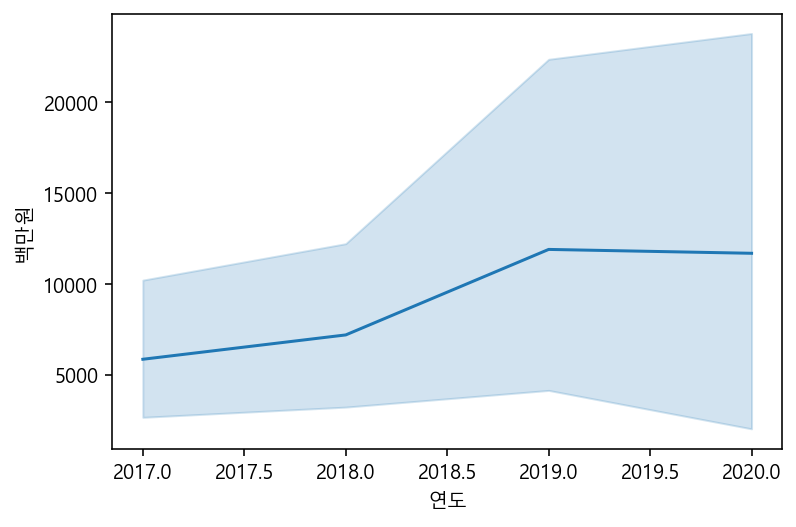

In [60]:
sns.lineplot(data=df_total, x="연도", y="백만원")

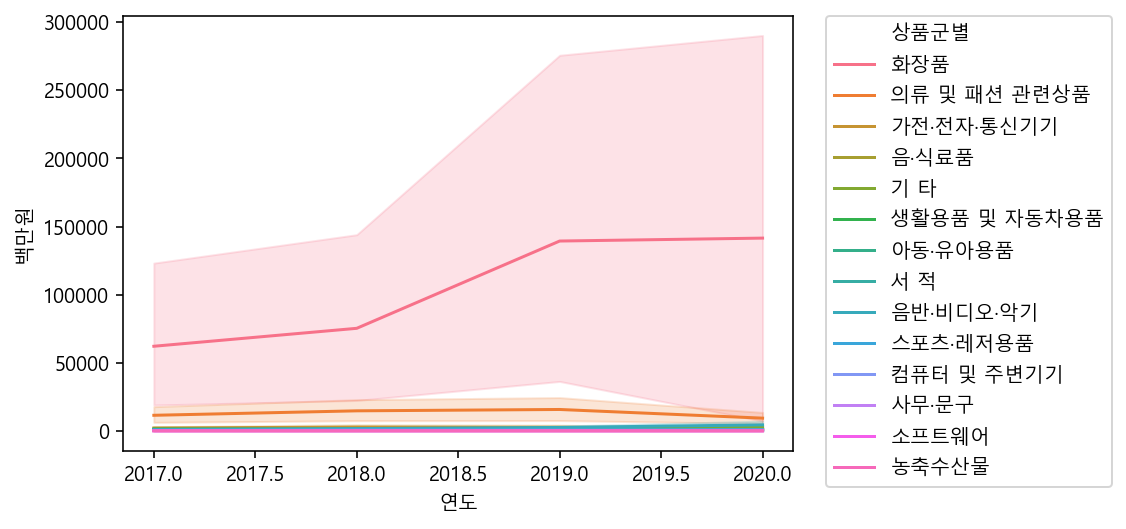

In [61]:
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

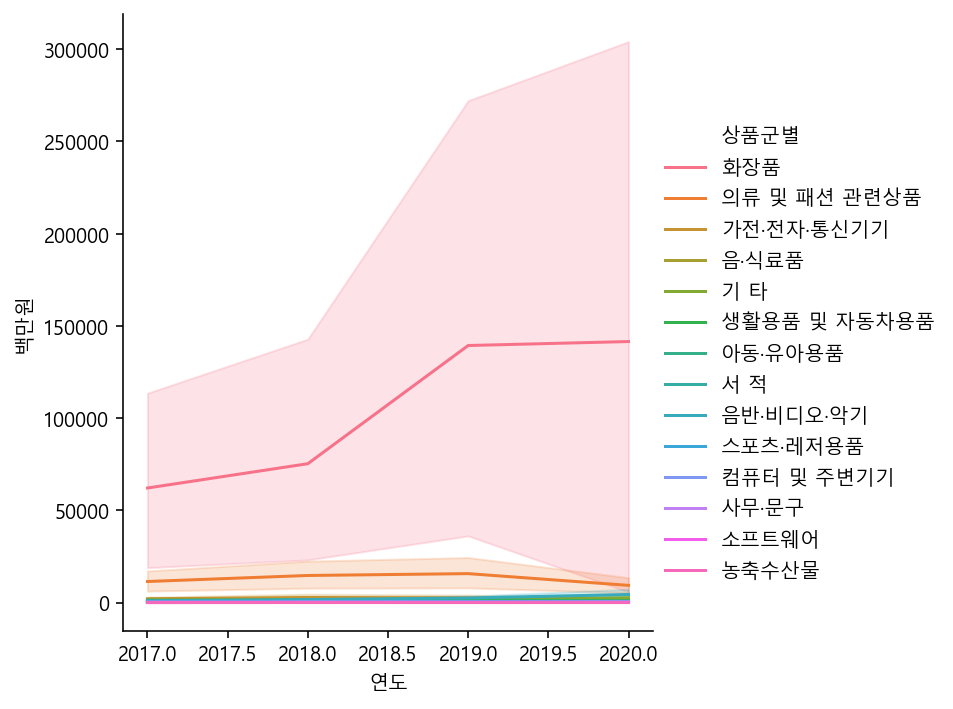

In [62]:
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line")

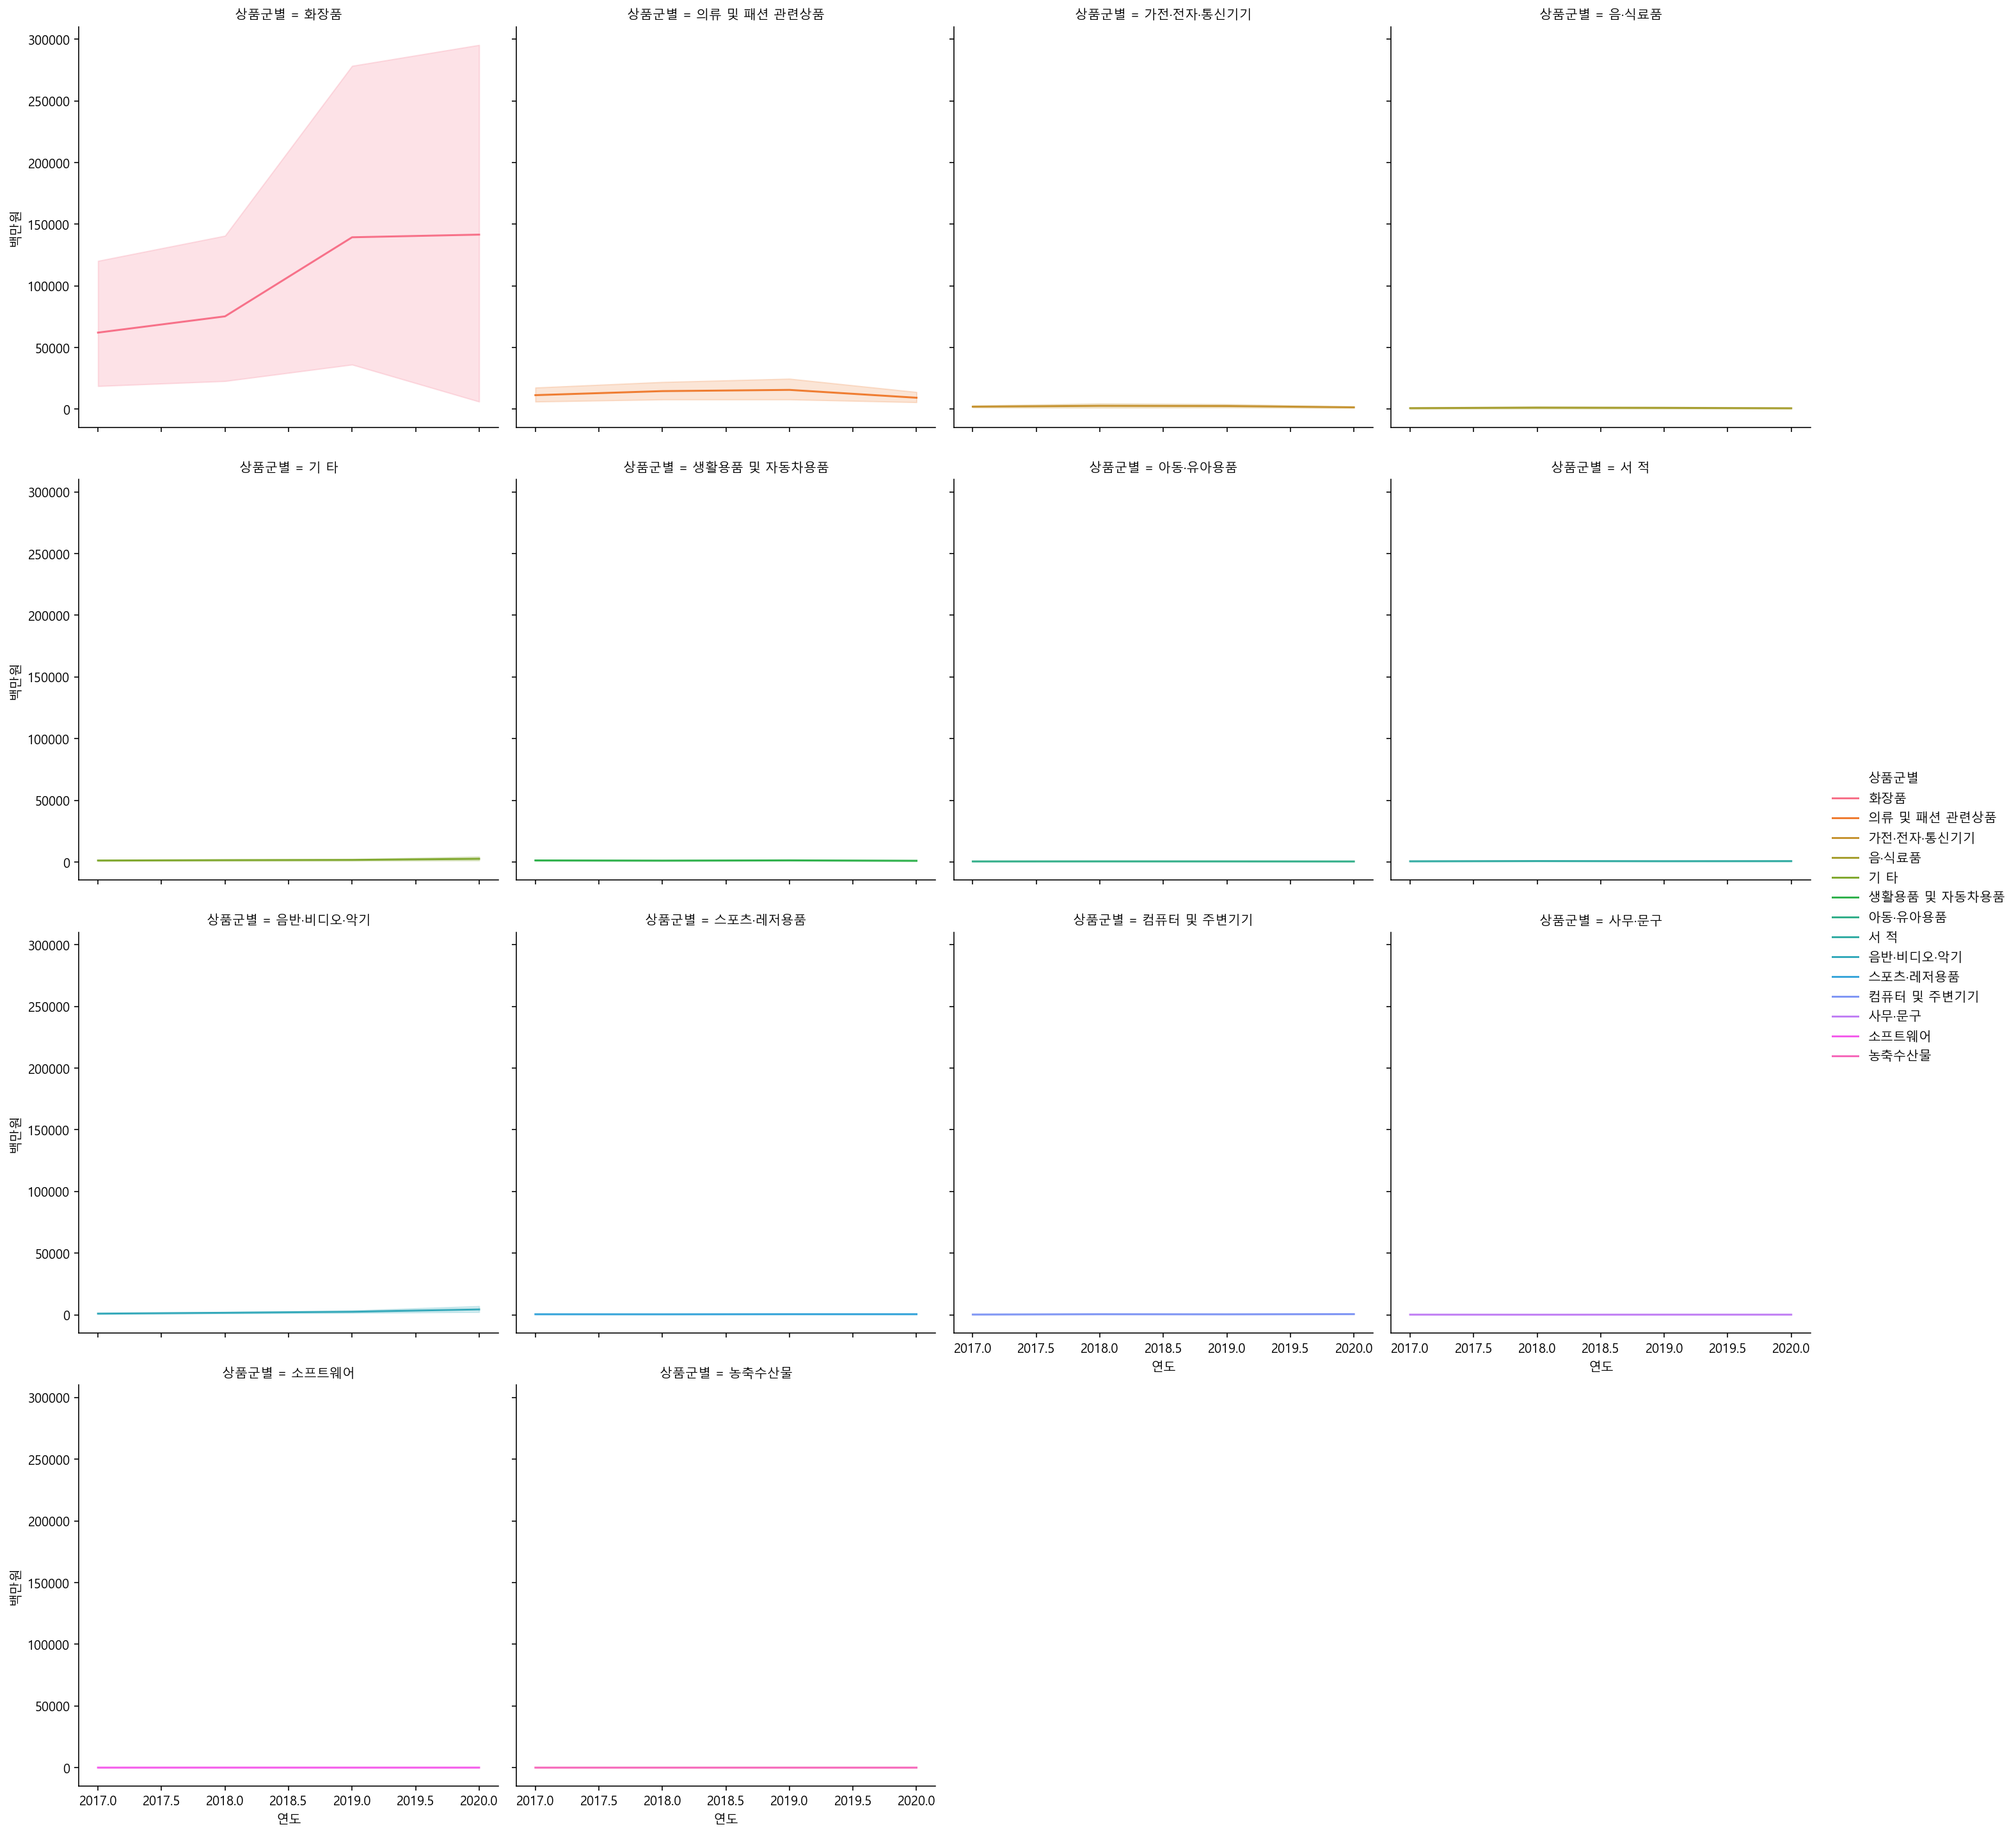

In [63]:
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [64]:
df_sub = df_total[~df_total["상품군별"].isin(["화장품"])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
11,중국,의류 및 패션 관련상품,계,2017 1/4,58124.0,2017,1
26,일본,의류 및 패션 관련상품,계,2017 1/4,20547.0,2017,1
31,미국,의류 및 패션 관련상품,계,2017 1/4,13606.0,2017,1
43,중국,가전·전자·통신기기,계,2017 1/4,7834.0,2017,1
48,중국,음·식료품,계,2017 1/4,7064.0,2017,1
...,...,...,...,...,...,...,...
6647,기타,농축수산물,계,2020 3/4 p),1.0,2020,3
6693,유럽연합(EU),농축수산물,계,2020 3/4 p),0.0,2020,3
6710,중동,농축수산물,계,2020 3/4 p),0.0,2020,3
6727,중남미,농축수산물,계,2020 3/4 p),0.0,2020,3


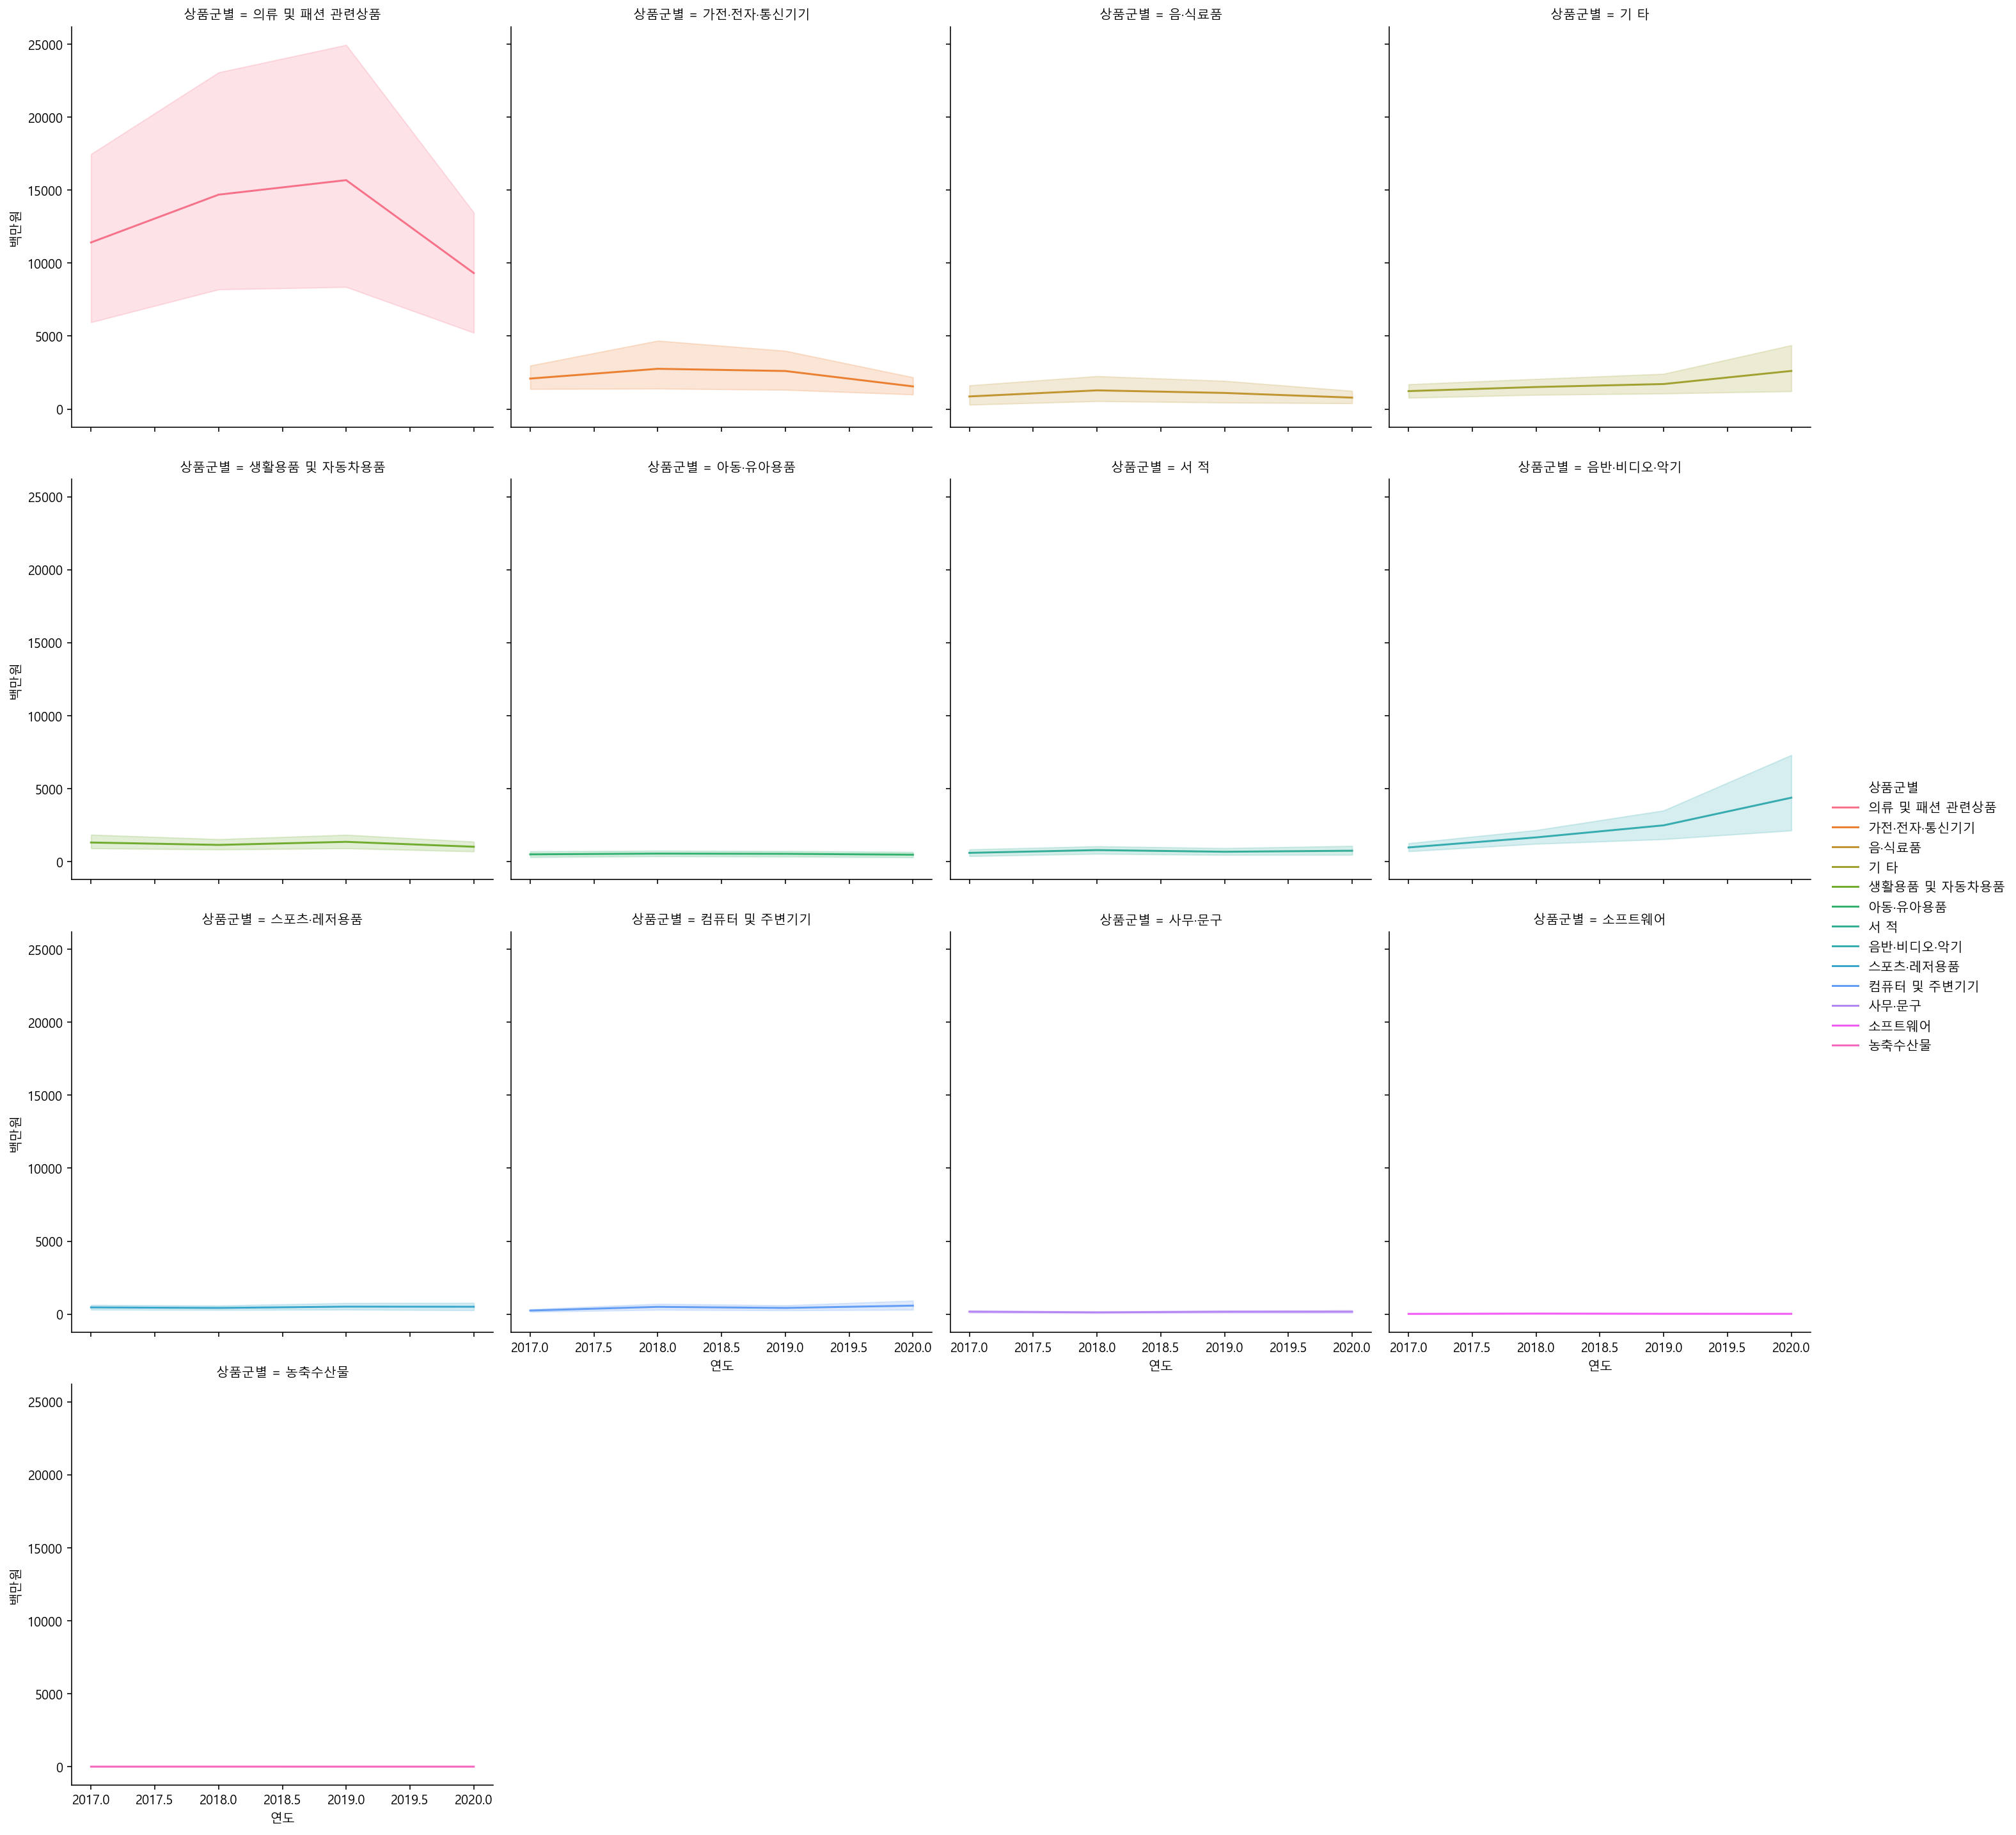

In [65]:
sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", col="상품군별", col_wrap=4, kind="line")


In [66]:
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션관련 상품"])].copy()

In [67]:
df_total["상품군별"] == "화장품"

6        True
11      False
23       True
26      False
30       True
        ...  
6647    False
6693    False
6710    False
6727    False
6738    False
Name: 상품군별, Length: 1890, dtype: bool

In [68]:
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
6,중국,화장품,계,2017 1/4,535868.0,2017,1
23,기타,화장품,계,2017 1/4,25530.0,2017,1
30,미국,화장품,계,2017 1/4,15510.0,2017,1
56,일본,화장품,계,2017 1/4,5018.0,2017,1
61,아세안(ASEAN),화장품,계,2017 1/4,4845.0,2017,1
...,...,...,...,...,...,...,...
6361,아세안(ASEAN),화장품,계,2020 3/4 p),5977.0,2020,3
6381,유럽연합(EU),화장품,계,2020 3/4 p),1946.0,2020,3
6413,대양주,화장품,계,2020 3/4 p),614.0,2020,3
6459,중동,화장품,계,2020 3/4 p),543.0,2020,3


In [69]:
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

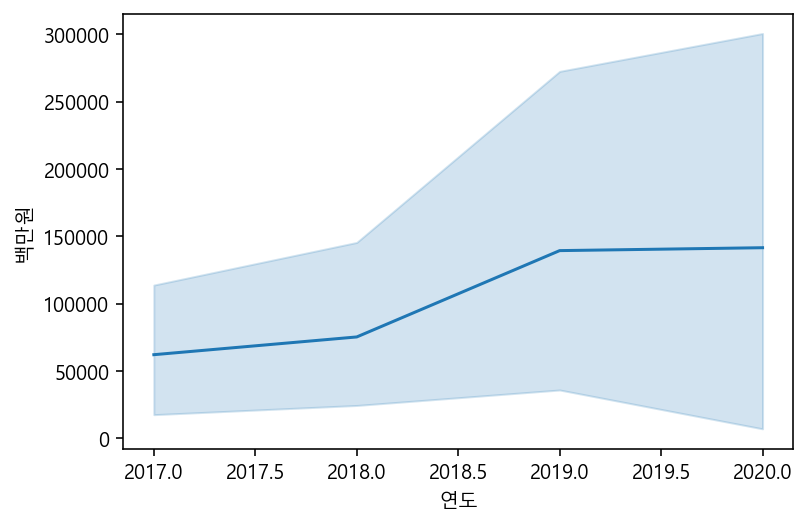

In [70]:
sns.lineplot(data=df_cosmetic, x="연도", y="백만원")

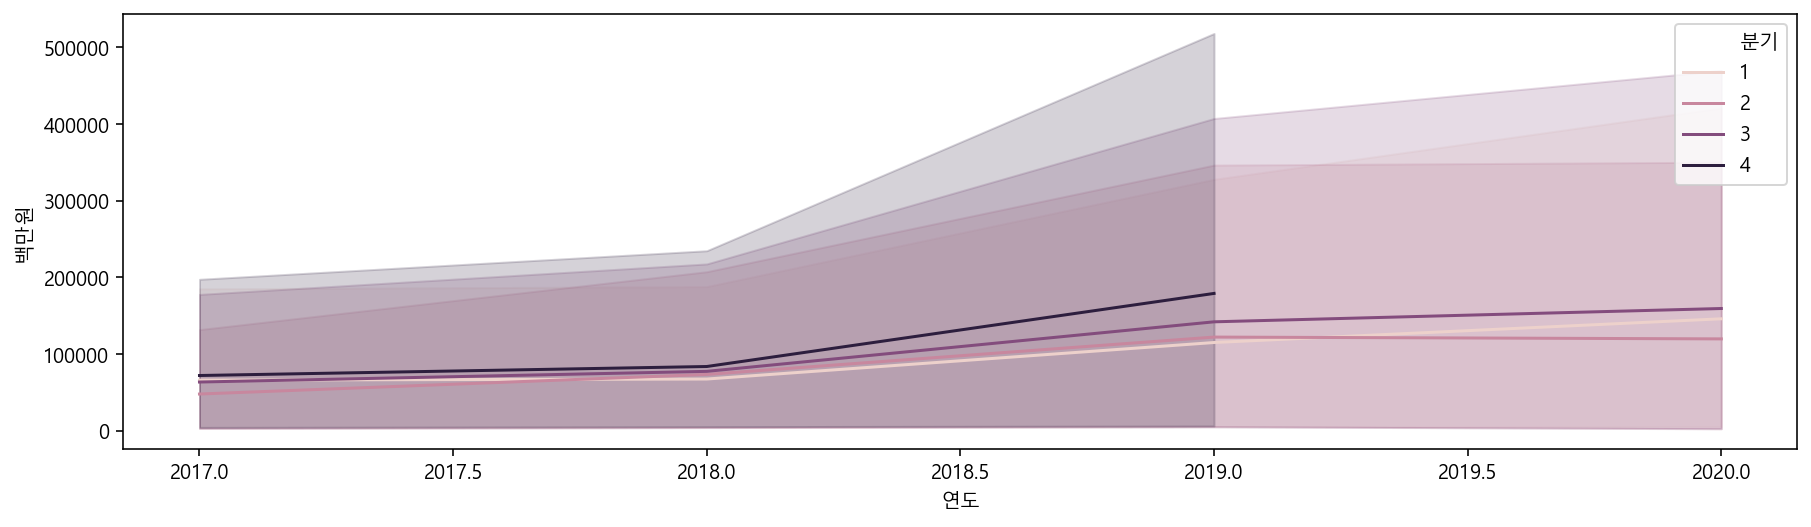

In [71]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

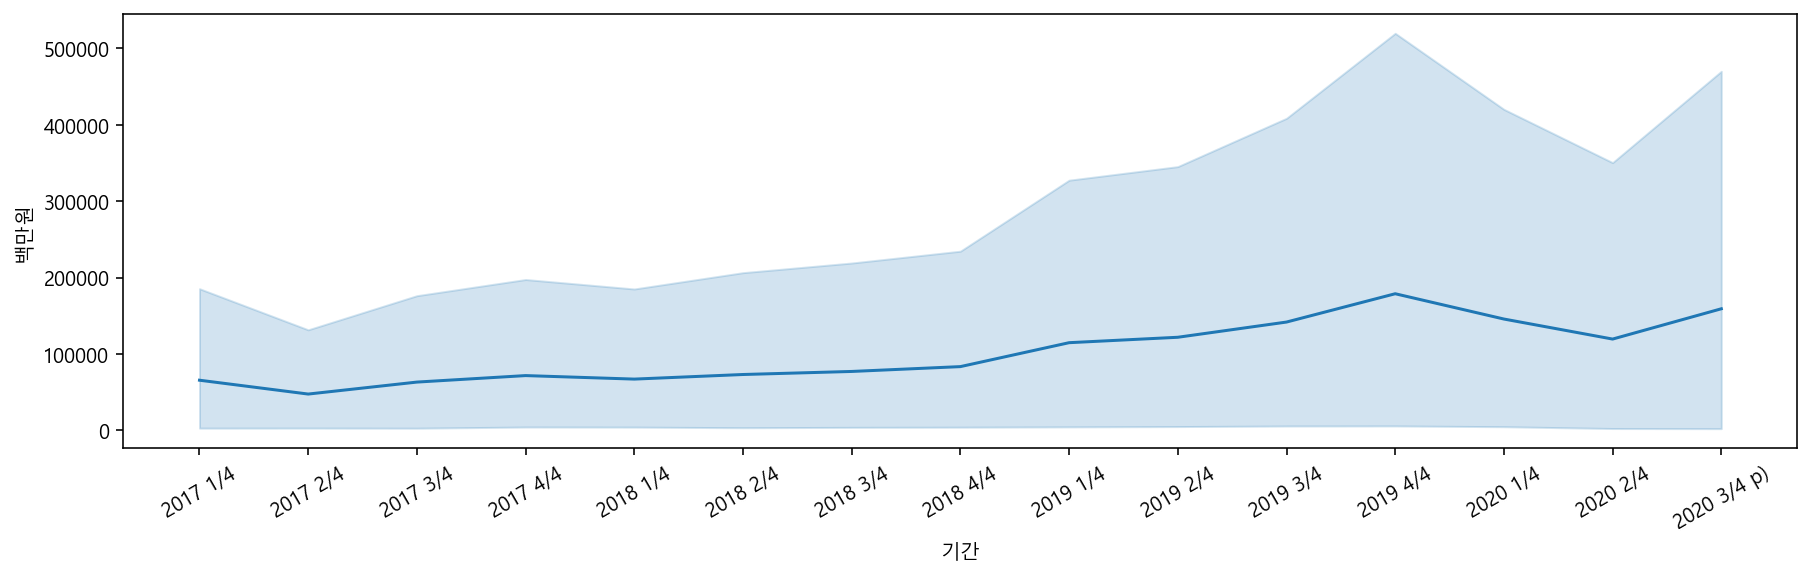

In [72]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

In [73]:
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
6,중국,화장품,계,2017 1/4,535868.0,2017,1
23,기타,화장품,계,2017 1/4,25530.0,2017,1
30,미국,화장품,계,2017 1/4,15510.0,2017,1
56,일본,화장품,계,2017 1/4,5018.0,2017,1
61,아세안(ASEAN),화장품,계,2017 1/4,4845.0,2017,1


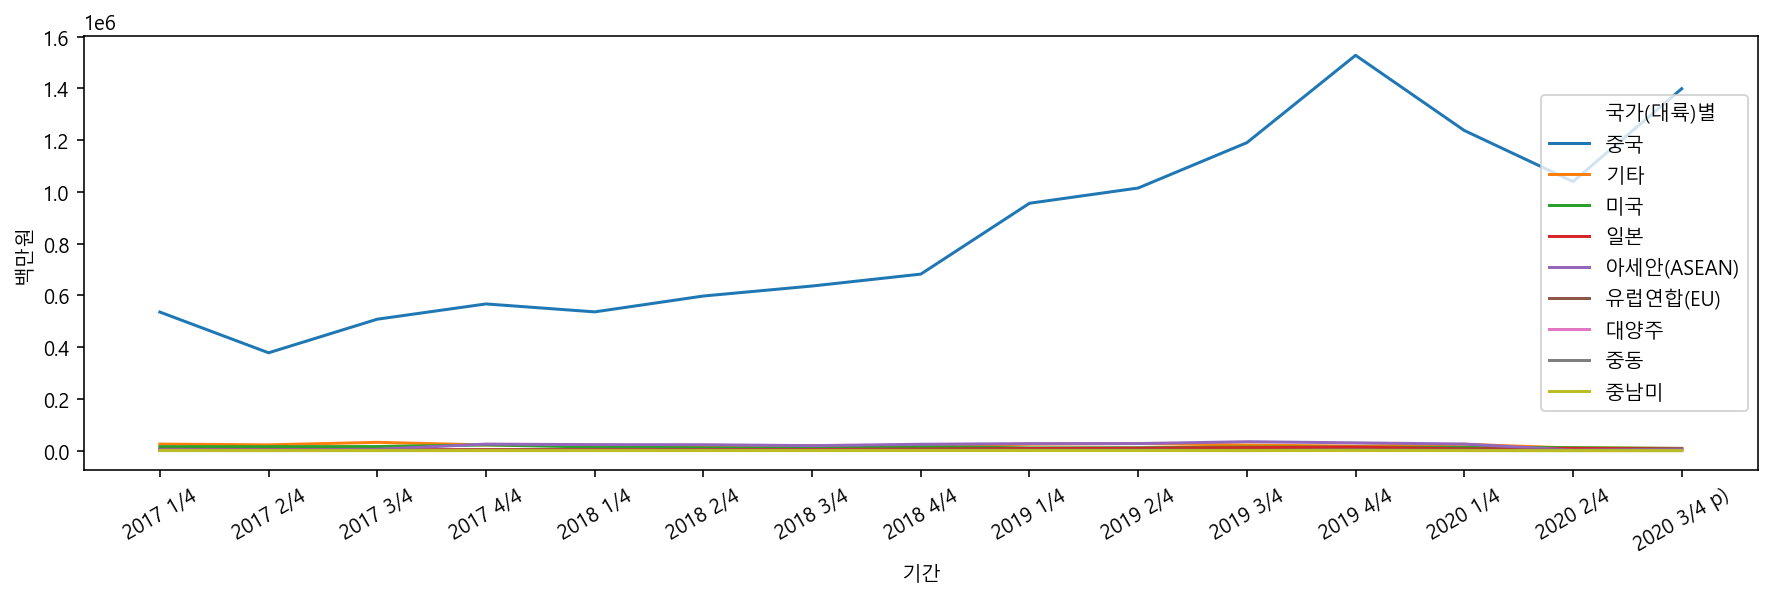

In [76]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

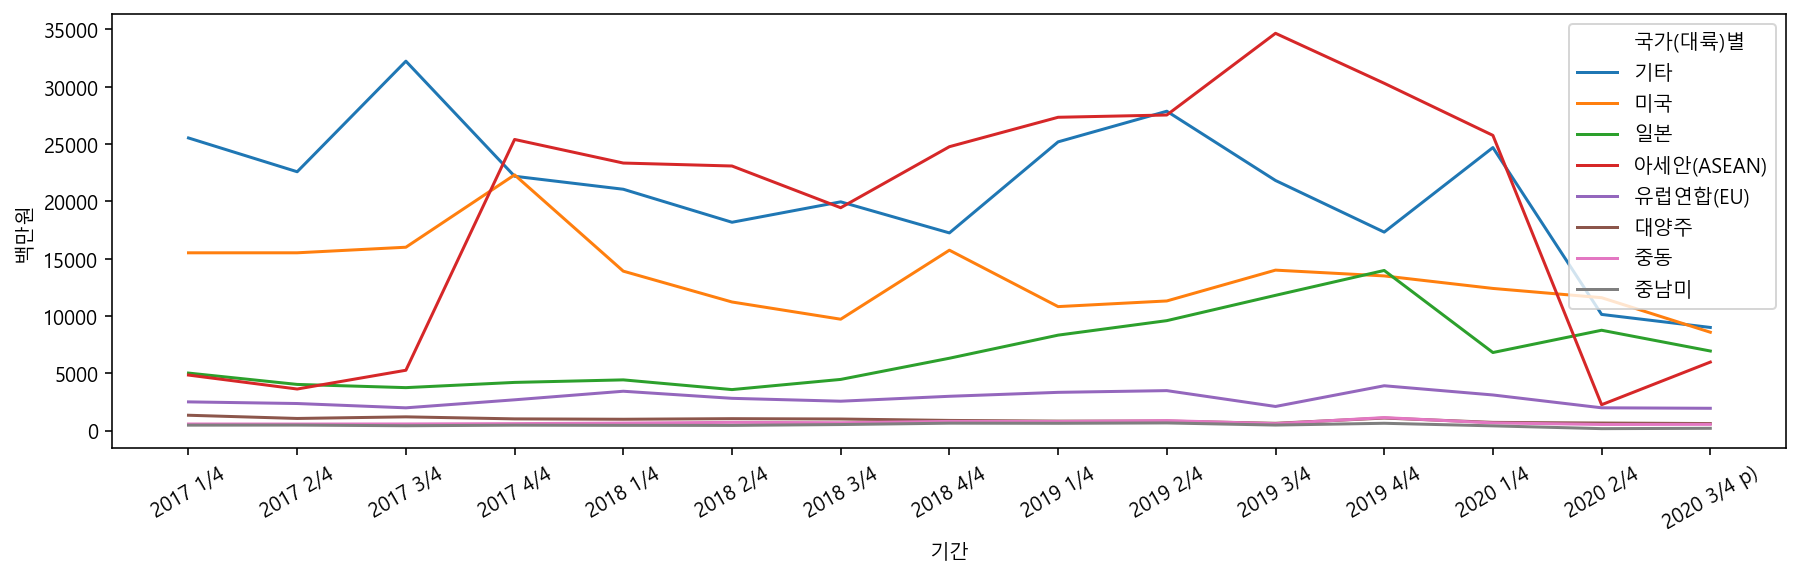

In [79]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"]!="중국"], x="기간", y="백만원", hue="국가(대륙)별")

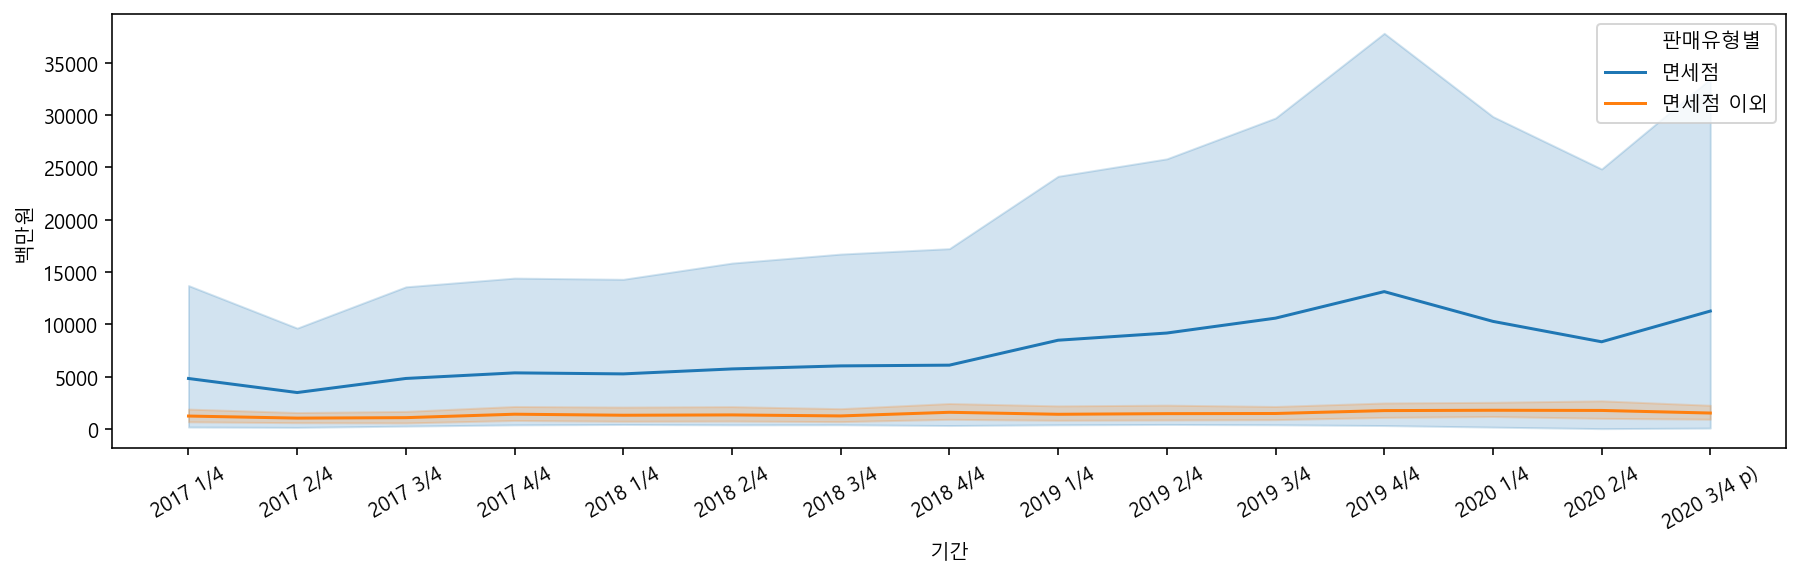

In [80]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

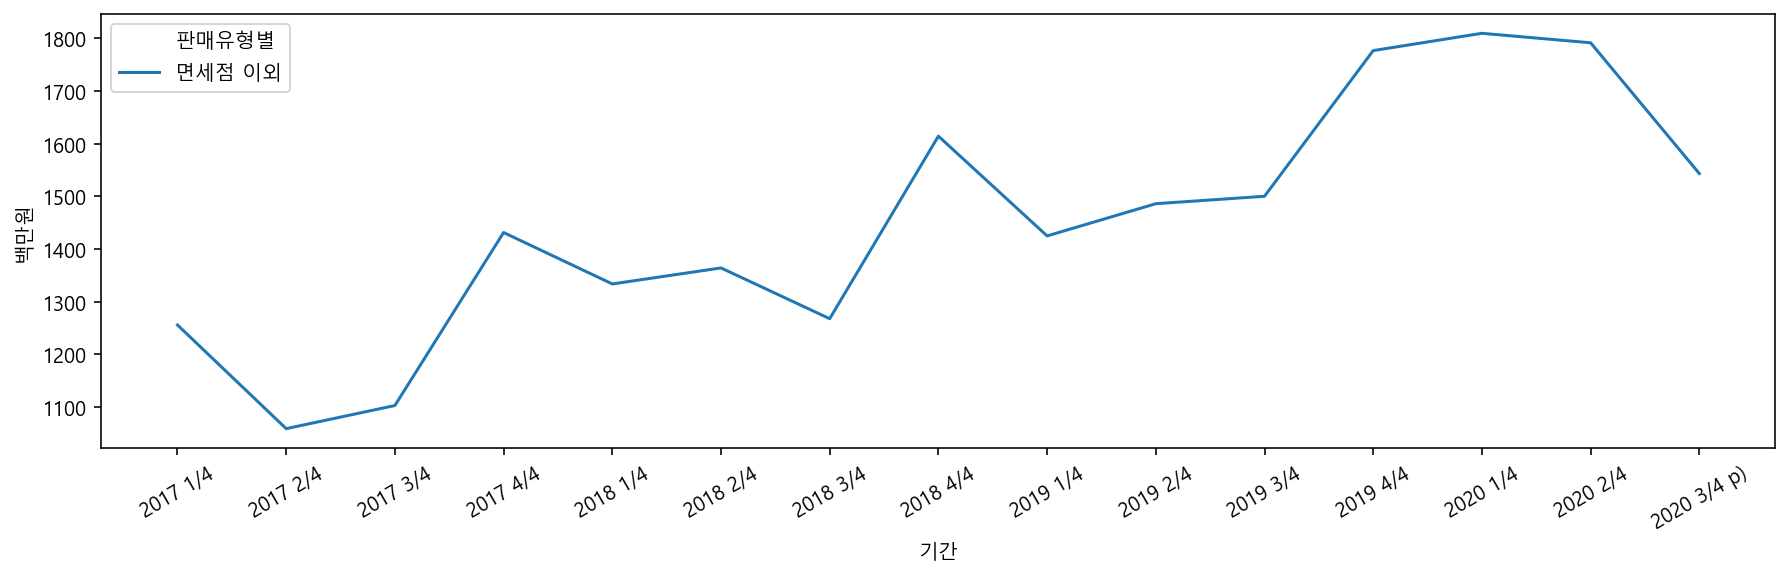

In [81]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", ci=None)

In [86]:
df_fashion = df_total[df_total["상품군별"] == "의류 및 패션 관련상품"].copy()
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
11,중국,의류 및 패션 관련상품,계,2017 1/4,58124.0,2017,1
26,일본,의류 및 패션 관련상품,계,2017 1/4,20547.0,2017,1
31,미국,의류 및 패션 관련상품,계,2017 1/4,13606.0,2017,1
54,아세안(ASEAN),의류 및 패션 관련상품,계,2017 1/4,5704.0,2017,1
103,기타,의류 및 패션 관련상품,계,2017 1/4,1602.0,2017,1
...,...,...,...,...,...,...,...
6403,기타,의류 및 패션 관련상품,계,2020 3/4 p),1675.0,2020,3
6428,유럽연합(EU),의류 및 패션 관련상품,계,2020 3/4 p),1247.0,2020,3
6456,대양주,의류 및 패션 관련상품,계,2020 3/4 p),979.0,2020,3
6511,중동,의류 및 패션 관련상품,계,2020 3/4 p),538.0,2020,3


In [87]:
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
11,중국,의류 및 패션 관련상품,계,2017 1/4,58124.0,2017,1
26,일본,의류 및 패션 관련상품,계,2017 1/4,20547.0,2017,1
31,미국,의류 및 패션 관련상품,계,2017 1/4,13606.0,2017,1
54,아세안(ASEAN),의류 및 패션 관련상품,계,2017 1/4,5704.0,2017,1
103,기타,의류 및 패션 관련상품,계,2017 1/4,1602.0,2017,1


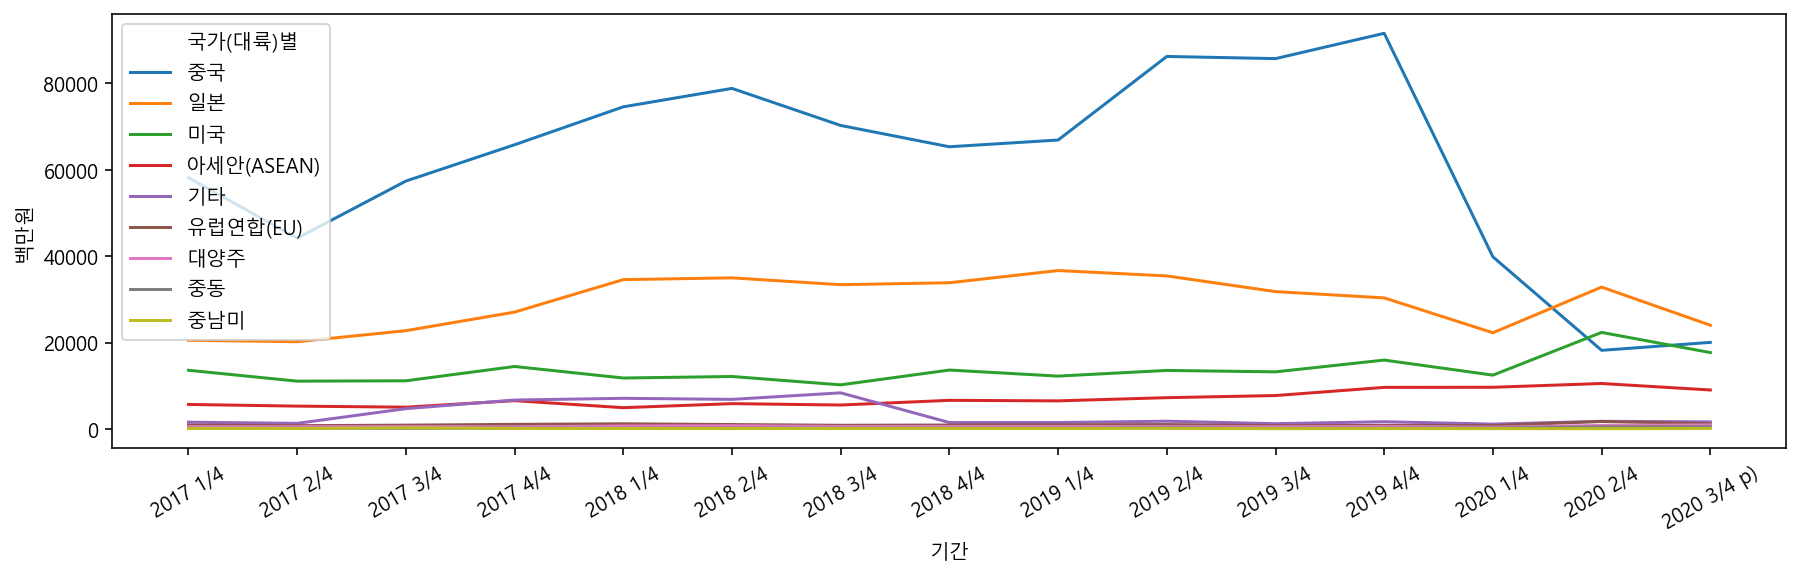

In [88]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

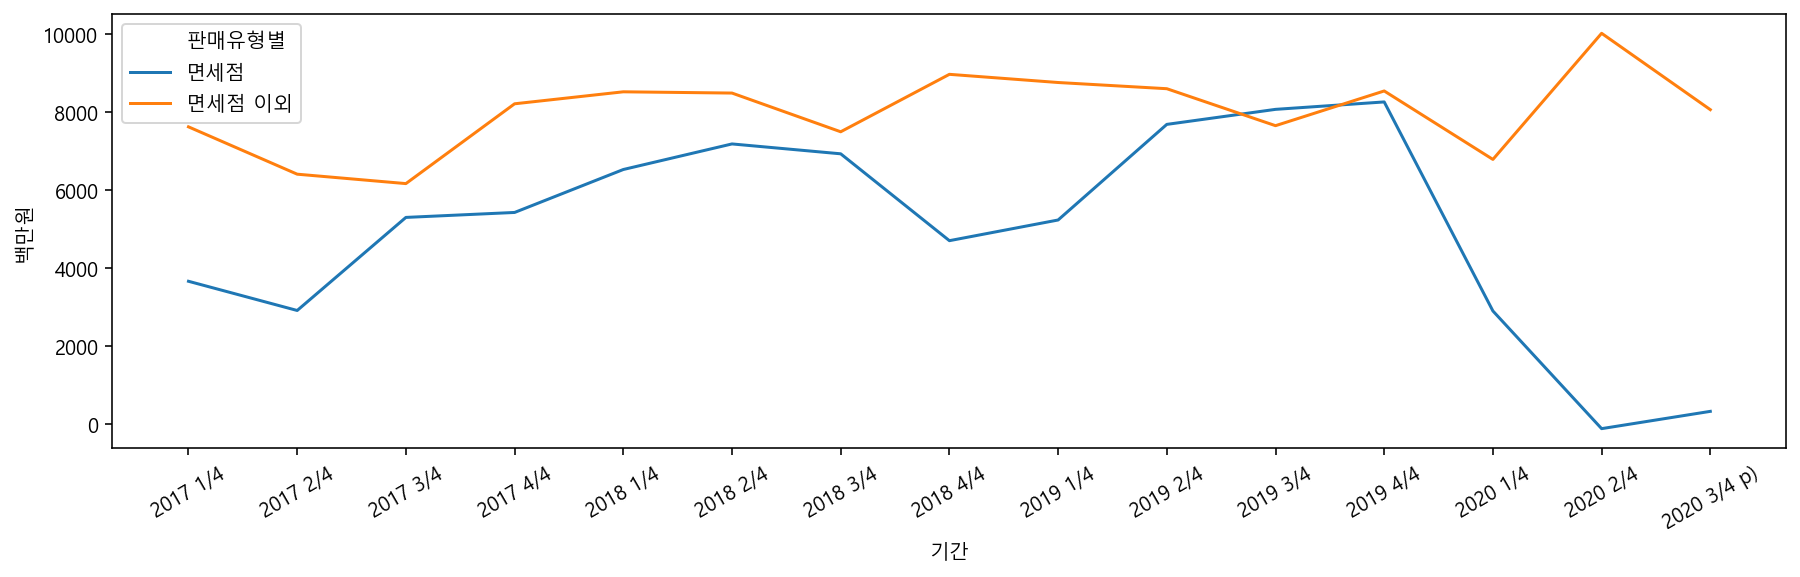

In [90]:
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)

In [91]:
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
11,중국,의류 및 패션 관련상품,계,2017 1/4,58124.0,2017,1
26,일본,의류 및 패션 관련상품,계,2017 1/4,20547.0,2017,1
31,미국,의류 및 패션 관련상품,계,2017 1/4,13606.0,2017,1
54,아세안(ASEAN),의류 및 패션 관련상품,계,2017 1/4,5704.0,2017,1
103,기타,의류 및 패션 관련상품,계,2017 1/4,1602.0,2017,1
...,...,...,...,...,...,...,...
6403,기타,의류 및 패션 관련상품,계,2020 3/4 p),1675.0,2020,3
6428,유럽연합(EU),의류 및 패션 관련상품,계,2020 3/4 p),1247.0,2020,3
6456,대양주,의류 및 패션 관련상품,계,2020 3/4 p),979.0,2020,3
6511,중동,의류 및 패션 관련상품,계,2020 3/4 p),538.0,2020,3


In [92]:
df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원")

연도,2017,2018,2019,2020
국가(대륙)별,,,,
기타,3596.75,5975.25,1577.25,1546.000000
대양주,566.50,681.25,596.75,764.000000
미국,12588.25,11968.75,13758.75,17513.666667
아세안(ASEAN),5667.75,5767.00,7804.25,9757.000000
유럽연합(EU),934.00,1028.50,923.50,1274.000000
일본,22646.00,34200.00,33560.75,26385.000000
중국,56351.75,72212.00,82563.50,26038.666667
중남미,190.50,144.00,135.75,120.333333
중동,193.00,219.75,231.00,445.000000


In [93]:
df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")

연도,2017,2018,2019,2020
국가(대륙)별,,,,
기타,14387.0,23901.0,6309.0,4638.0
대양주,2266.0,2725.0,2387.0,2292.0
미국,50353.0,47875.0,55035.0,52541.0
아세안(ASEAN),22671.0,23068.0,31217.0,29271.0
유럽연합(EU),3736.0,4114.0,3694.0,3822.0
일본,90584.0,136800.0,134243.0,79155.0
중국,225407.0,288848.0,330254.0,78116.0
중남미,762.0,576.0,543.0,361.0
중동,772.0,879.0,924.0,1335.0


In [94]:
df_fashion["판매유형별"].value_counts()

계    135
Name: 판매유형별, dtype: int64

In [95]:
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")
result

연도,2017,2018,2019,2020
국가(대륙)별,,,,
기타,14387.0,23901.0,6309.0,4638.0
대양주,2266.0,2725.0,2387.0,2292.0
미국,50353.0,47875.0,55035.0,52541.0
아세안(ASEAN),22671.0,23068.0,31217.0,29271.0
유럽연합(EU),3736.0,4114.0,3694.0,3822.0
일본,90584.0,136800.0,134243.0,79155.0
중국,225407.0,288848.0,330254.0,78116.0
중남미,762.0,576.0,543.0,361.0
중동,772.0,879.0,924.0,1335.0


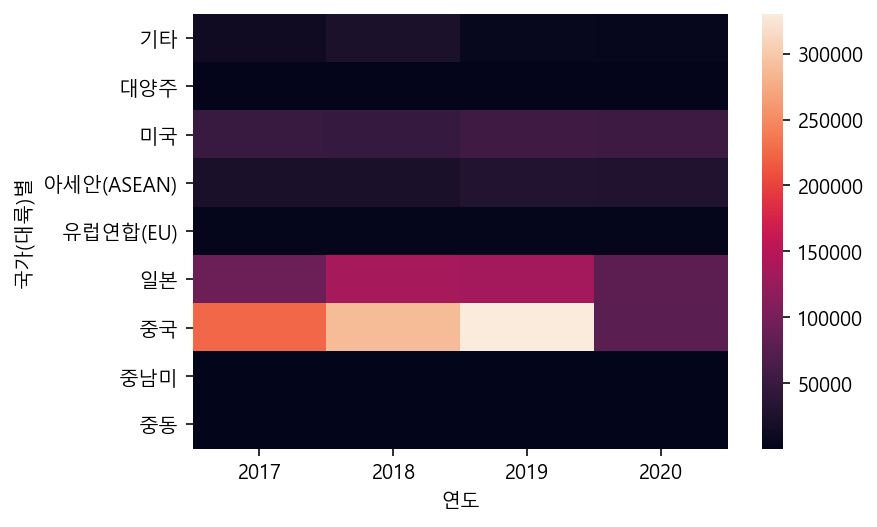

In [96]:
sns.heatmap(result)

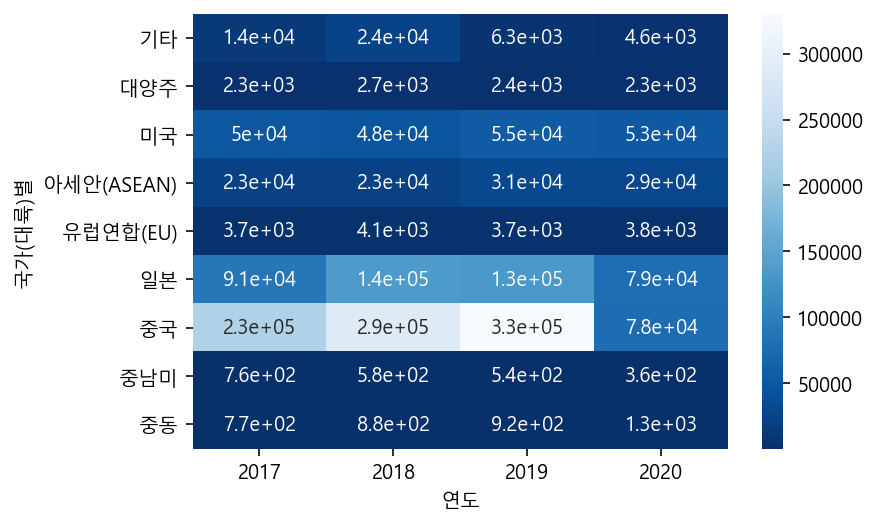

In [97]:
sns.heatmap(result, cmap = "Blues_r", annot=True)

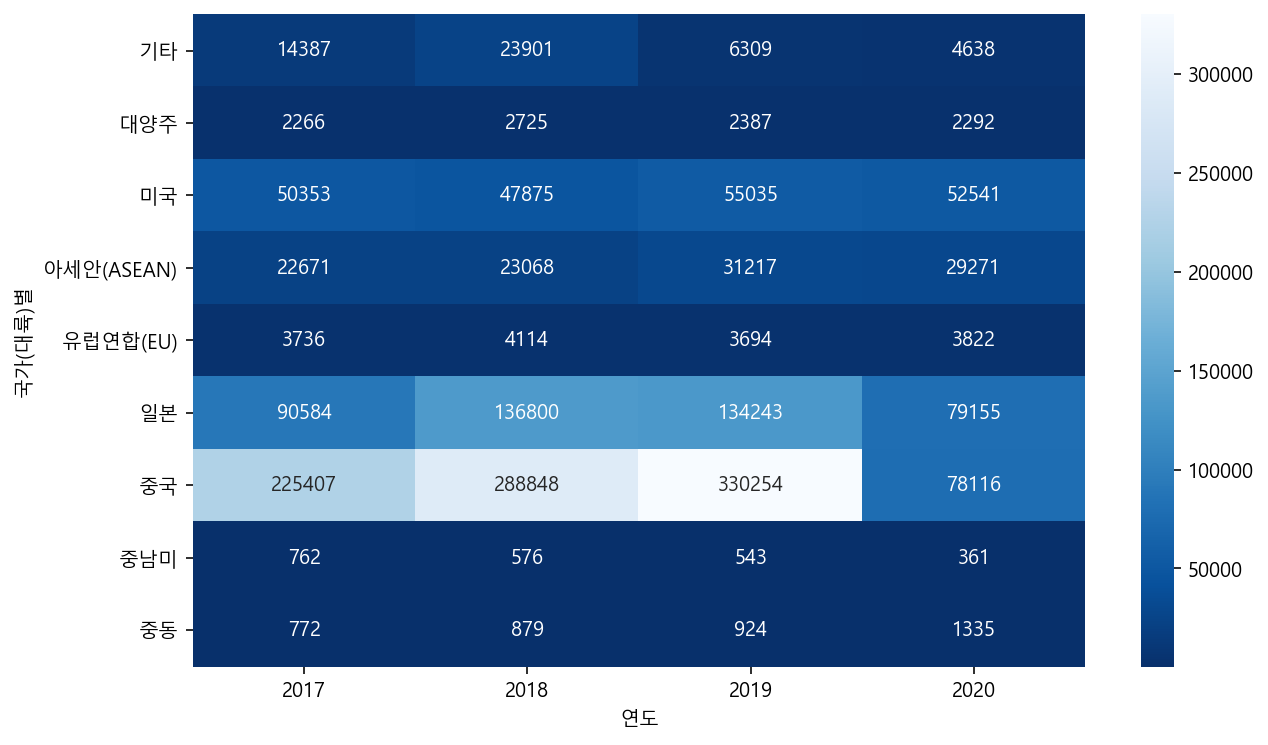

In [98]:
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap="Blues_r", annot=True, fmt=".0f")

In [99]:
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
6,중국,화장품,계,2017 1/4,535868.0,2017,1
11,중국,의류 및 패션 관련상품,계,2017 1/4,58124.0,2017,1
23,기타,화장품,계,2017 1/4,25530.0,2017,1
26,일본,의류 및 패션 관련상품,계,2017 1/4,20547.0,2017,1
30,미국,화장품,계,2017 1/4,15510.0,2017,1
...,...,...,...,...,...,...,...
6647,기타,농축수산물,계,2020 3/4 p),1.0,2020,3
6693,유럽연합(EU),농축수산물,계,2020 3/4 p),0.0,2020,3
6710,중동,농축수산물,계,2020 3/4 p),0.0,2020,3
6727,중남미,농축수산물,계,2020 3/4 p),0.0,2020,3


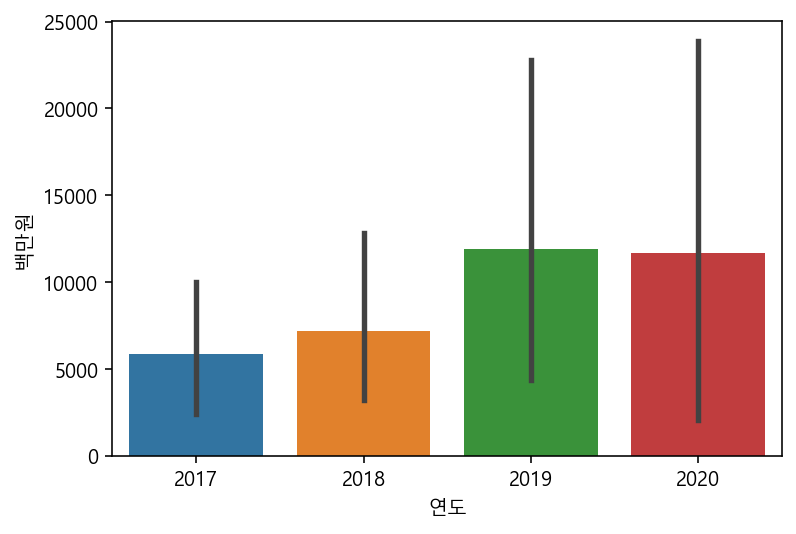

In [100]:
sns.barplot(data=df_total, x="연도", y="백만원")


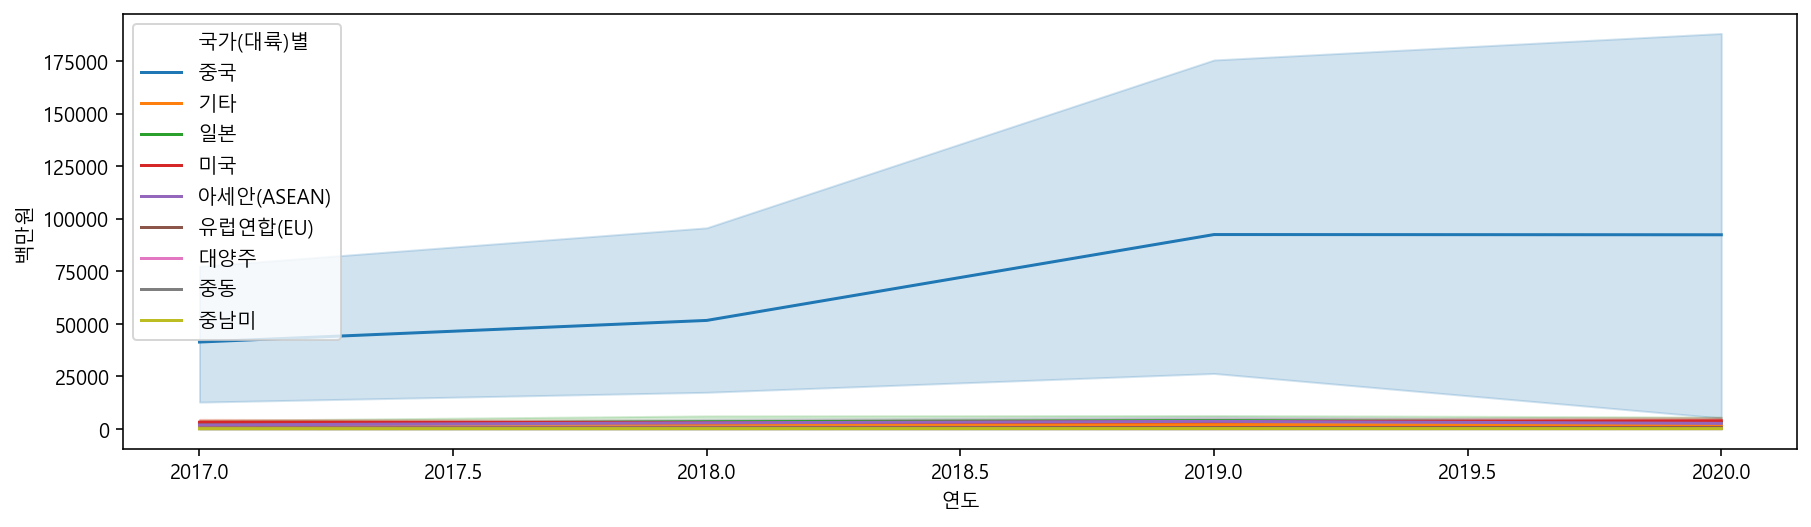

In [101]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

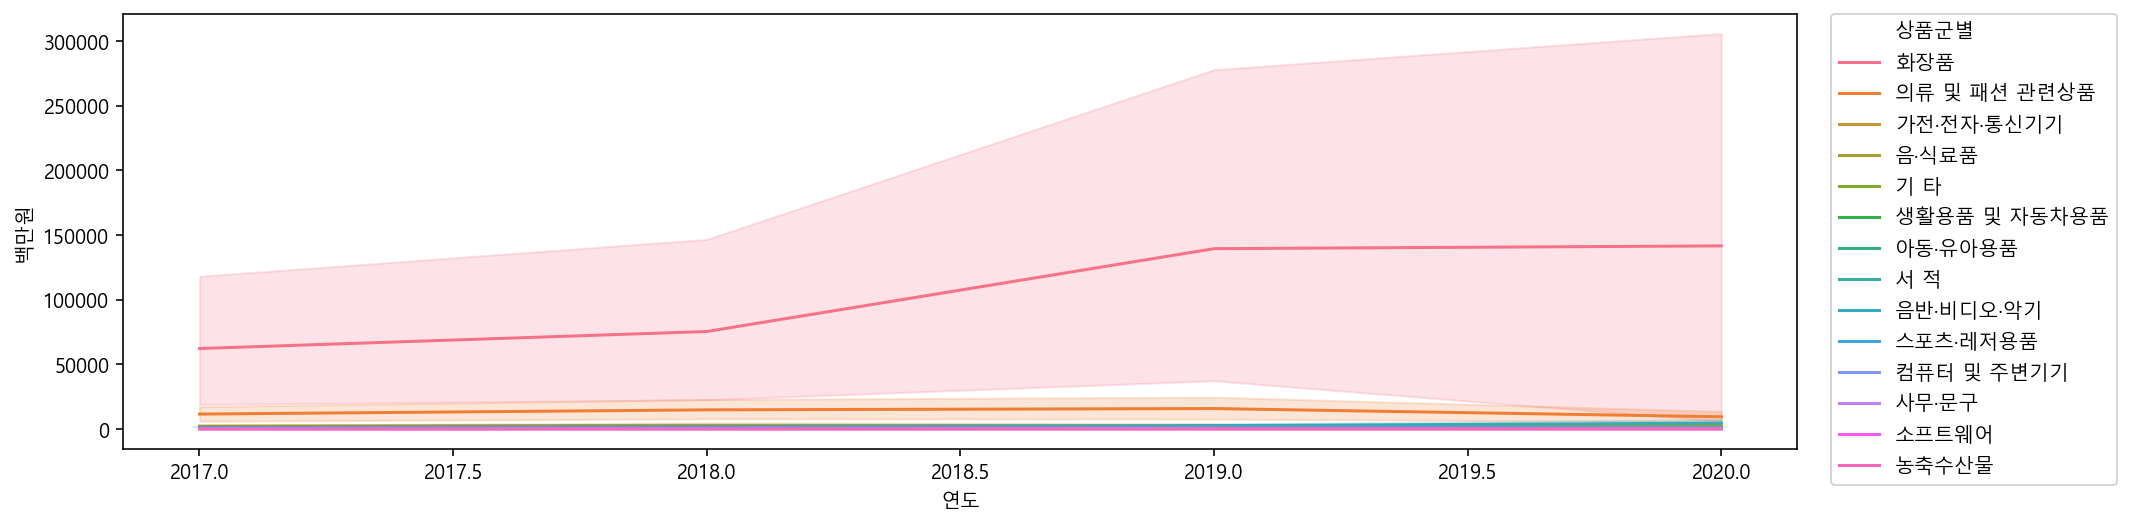

In [102]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)